In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import RocCurveDisplay # Plot the ROC 
from sklearn import metrics

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

import datetime
import pandas as pd
from google.colab import drive # Mount the Google drive
from google.colab import files # Save the experimental results to the Google drive 
import warnings

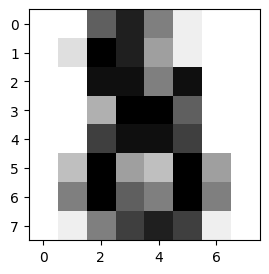

In [ ]:
digits = datasets.load_digits() 
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [ ]:
nameFeatures = ('FEA 1', 'FEA 2', 'FEA 3', 'FEA 4', 'FEA 5', 'FEA 6', 'FEA 7', 'FEA 8', 'FEA 9', 'FEA 10', 'FEA 11', 'FEA 12', 'FEA 13', 'FEA 14', 'FEA 15', 'FEA 16', 'FEA 17', 'FEA 18', 'FEA 19', 'FEA 20', 'FEA 21', 'FEA 22', 'FEA 23', 'FEA 24', 'FEA 25', 'FEA 26', 'FEA 27', 'FEA 28', 'FEA 29', 'FEA 30', 'FEA 31', 'FEA 32', 'FEA 33', 'FEA 34', 'FEA 35', 'FEA 36', 'FEA 37', 'FEA 38', 'FEA 39', 'FEA 40', 'FEA 41', 'FEA 42', 'FEA 43', 'FEA 44', 'FEA 45', 'FEA 46', 'FEA 47', 'FEA 48', 'FEA 49', 'FEA 50', 'FEA 51', 'FEA 52', 'FEA 53', 'FEA 54', 'FEA 55', 'FEA 56', 'FEA 57', 'FEA 58', 'FEA 59', 'FEA 60', 'FEA 61', 'FEA 62', 'FEA 63', 'FEA 64')
# Load dataset
X = digits.data
Y = digits.target
clf = LogisticRegression(C=0.05)
# Run one-time classification on the whole dataset
one_cls(X, Y, clf)

0.9638386648122392

In [ ]:
# Main part of genetic search
n_Features = len(nameFeatures)
# Genetic algorithm metaparameters
K_BEST = 12      # Number of resulting features 
M_BEST = 3      # Number of rhe best models
POP_SIZE = 14   # Number of variuos models min = M_BEST
MUT_PROB = 2*1/K_BEST  # Chance of mutation for each feature
MAX_ITER = 100   # Times POP_SIZE equals number of fits
# ---
# Statistics each round for the best one and the population
topM_score = np.zeros(M_BEST)
topM_feat  = np.zeros([M_BEST,n_Features])
# ---
# Main loop of the genetic algorithm
population, scores  = create_population(n_Features, POP_SIZE, K_BEST)
for i in range(MAX_ITER):
  offspring           = cross_mutate(population, n_Features, MUT_PROB)
  scores_offspring    = offspring_evaluate(X,Y, clf, offspring)
  population, scores  = population_sort(population, offspring, scores, scores_offspring)
  topM_score, topM_feat = update_score_stat(population, scores, topM_score, topM_feat)
  # save_population(population, scores)
  print(f'Iteration: {i}, score of best: {topM_score[1]}, features: {topM_feat[1,:]}')
  print(f'Scores: {scores}')
  # print_statistics(topM_feat[0, :], nameFeatures, K_BEST)
# Save and show results
save_population(population, scores)
print_statistics(topM_score[1,:], nameFeatures)

In [ ]:
print_statistics(topM_feat[1,:], nameFeatures)

('FEA 34', 77.0)
('FEA 30', 69.0)
('FEA 27', 67.0)
('FEA 6', 63.0)
('FEA 22', 60.0)
('FEA 44', 56.0)
('FEA 19', 52.0)
('FEA 45', 46.0)
('FEA 36', 46.0)
('FEA 28', 40.0)
('FEA 62', 38.0)
('FEA 54', 36.0)
('FEA 10', 36.0)
('FEA 46', 35.0)
('FEA 20', 35.0)
('FEA 58', 33.0)
('FEA 39', 29.0)
('FEA 43', 28.0)
('FEA 3', 27.0)
('FEA 4', 25.0)
('FEA 63', 22.0)
('FEA 56', 22.0)
('FEA 51', 22.0)
('FEA 31', 20.0)
('FEA 21', 20.0)
('FEA 14', 19.0)
('FEA 11', 15.0)
('FEA 1', 15.0)
('FEA 59', 14.0)
('FEA 15', 13.0)
('FEA 37', 12.0)
('FEA 47', 10.0)
('FEA 8', 8.0)
('FEA 32', 8.0)
('FEA 49', 7.0)
('FEA 61', 6.0)
('FEA 55', 6.0)
('FEA 53', 5.0)
('FEA 18', 5.0)
('FEA 7', 4.0)
('FEA 35', 4.0)
('FEA 60', 3.0)
('FEA 5', 3.0)
('FEA 48', 3.0)
('FEA 33', 3.0)
('FEA 24', 3.0)
('FEA 2', 3.0)
('FEA 9', 2.0)
('FEA 57', 2.0)
('FEA 41', 2.0)
('FEA 40', 2.0)
('FEA 12', 2.0)
('FEA 38', 1.0)
('FEA 26', 1.0)
('FEA 25', 1.0)
('FEA 23', 1.0)
('FEA 13', 1.0)
('FEA 64', 0.0)
('FEA 52', 0.0)
('FEA 50', 0.0)
('FEA 42', 0.0)
(

In [ ]:
topM_feat[1,:]

array([15.,  3., 27., 25.,  3., 63.,  4.,  8.,  2., 36., 15.,  2.,  1.,
       19., 13.,  0.,  0.,  5., 52., 35., 20., 60.,  1.,  3.,  1.,  1.,
       67., 40.,  0., 69., 20.,  8.,  3., 77.,  4., 46., 12.,  1., 29.,
        2.,  2.,  0., 28., 56., 46., 35., 10.,  3.,  7.,  0., 22.,  0.,
        5., 36.,  6., 22.,  2., 33., 14.,  3.,  6., 38., 22.,  0.])

In [ ]:
def one_cls(X, Y, clf):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
  with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    clf.fit(X_train, y_train)
  #preds = clf.predict_proba(X)[::,1] # Probabilty for AUC
  preds = clf.predict(X_test)  
  acc = np.mean(preds == y_test)
#  print(f'Accur = {acc}')
  return acc

In [ ]:
def create_population(n_Features, POP_SIZE, K_BEST):
  # Create a random population to start with 
  population = np.empty([POP_SIZE, K_BEST], dtype=int)
  for i in range(POP_SIZE):
    population[i, :] = np.random.choice(range(n_Features), size=K_BEST, replace=False)
  scores =  np.zeros(POP_SIZE) # There is no need to evaluate now (the bigger the better)
  return(population, scores)

In [ ]:
def cross_mutate(population, n_Features, MUT_PROB):
  offspring = np.empty_like(population)
  # First genetic step is to crossover all members of the population
  for idx, mom  in enumerate(population):           # For each mom
    dad = population[np.random.choice(len(population)), :] # Get a random dad
    kBest = population.shape[1]
    rnd = np.random.choice(kBest)                  # Pick some chromosomes
    kid = np.concatenate((mom[:rnd], dad[-(kBest-rnd):])) # Make a kid
    offspring[idx, :] = kid                         # Put it to new tribe
    #print(idx, rnd, mom, dad, kid)
  # Second genetic step is to mutate each member of the new population
  for idx, kid  in enumerate(offspring):
    mutation = np.random.choice([0, 1], size=kBest, p=[MUT_PROB, 1-MUT_PROB]) # Set random chromosomes
    unused = np.setdiff1d(np.arange(n_Features), kid)  # Find the new chromosomes
    if len(unused) >= np.sum(mutation):                # is there enough new chromosomes
      deviation = np.random.choice(unused, size=np.sum(mutation), replace=False)  # select a few
      #oldkid = np.array(kid) # debug
      _ = np.where(mutation == 1)[0]
      kid[_] = deviation
      #print(mutation, oldkid,  kid, deviation) # debug
    else:
      print('Mutation rate is too high') # Let the kid be same
    offspring[idx, :] = kid # Put mutated kid back to tribe
  return offspring

In [ ]:
def offspring_evaluate(X,Y, clf, offspring):
  scores_offspring = np.zeros(len(offspring))
  # Third genetic step is to evaluate the quality of each member
  for idx, kid in enumerate(offspring):
    X_cut = X[:, kid]
    acc = one_cls(X_cut, Y, clf)
    scores_offspring[idx] = acc # Evaluate each member of the offspring
  return scores_offspring

In [ ]:
def population_sort(population, offspring, scores, scores_offspring):
  # Join the old tribe and the offspring tribe
  population = np.concatenate((population, offspring), axis=0)
  scores     = np.concatenate((scores, scores_offspring), axis = 0)
  idx = np.argsort(-scores)[:len(scores_offspring)] # The bigger score the better
  scores     = scores[idx]  # Keep the best scores (cut to offspring size)
  population = population[idx,:] # Select the best members 
  return population, scores

In [ ]:
def update_score_stat(population, scores, topM_score, topM_feat):
# Statistics each round for the best one and the population
  for i, _ in enumerate(topM_score):
    topM_score[i] = scores[i] 
    kid = population[i, :]  # Just copy the first M scores to save
    # kid = np.array([3,4,5],  dtype=int) # Just for test
    topM_feat[i, kid] += 1  # Increase frequency of each selected feature
  return topM_score, topM_feat

In [ ]:
# Since genetics take long time, it is important to save the intermediate results
def save_population(population, scores):
  df_population = pd.DataFrame(population)      # Save the population with the features
  df_scores     = pd.DataFrame(scores)          # Save the scores to start from
  now = datetime.datetime.now()                 # Get today' time to make the filename
  date_time_str = now.strftime("%Y-%m-%d_%H-%M-%S") # Format it
  # --- 
  fn_population = f'Population_{date_time_str}.xlsx'
  fn_scores     = f'Scores_{date_time_str}.xlsx'
  df_population.to_excel(fn_population, index=False) # Save to an Excel file
  df_scores.to_excel(fn_scores, index=False)
  files.download(fn_population)
  files.download(fn_scores)
  return

In [ ]:
def print_statistics(frequencies, labels): # The last is not used
  # Print the names of the most frequest featues and their occurance
  # Thanks of ChatGPT
  zipped = zip(frequencies, labels) # Each feature has its frequency
  sorted_zipped = sorted(zipped, reverse=True) # Sort to show the best
  # Unzip the sorted zipped array
  sorted_frequencies, sorted_labels = zip(*sorted_zipped)
  # Print the sorted frequencies and labels
  # print("Sorted Frequencies:", sorted_frequencies)
  # print("Sorted Labels:", sorted_labels)
  for frequency, label in sorted_zipped:
        print((label, frequency))
  return